## Introduction

In this notebook we will cluster different types of **point guards** in NBA

**Point guards** play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team. We are going to focus our lesson on a machine learning technique called clustering, which allows us to visualize the types of point guards as well as group similar point guards together. Using 2 features allows us to easily visualize the players and will also make it easier to grasp how clustering works. For point guards, it's widely accepted that the ***Assist to Turnover*** Ratio is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. Let's also use ***Points Per Game***, since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

## Read the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [2]:
# New dataframe only containing point guards.
point_guards = nba[nba['pos']=='PG'].copy()

# calculate points per game for each point guard.
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check
point_guards[['pts', 'g', 'ppg']].head()

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


In [3]:
# Drop all rows with 0 turnovers
point_guards = point_guards[point_guards['tov']!=0]

# Calculate assist to turnover ratio.
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

## Visualise the point guards

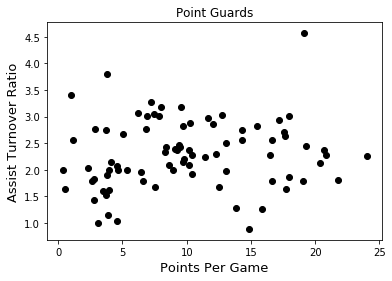

In [4]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='black')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

There seem to be 5 clusters into which the point guards roughly fall into. 

## The Algorithm
Setup K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster. To start, select 5 players at random and assign their coordinates as the initial centroids of the just created clusters.

Step 1 (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (atr) and the average of all of the Y values (ppg) of the points in that cluster.

Iterate Repeat steps 1 & 2 until the clusters are no longer moving and have converged.

In [5]:
# Identify the number of clusters
num_clusters = 5

# Use numpy's random function to generate a list
# The length of the list is equal to the number of clusters.
# The list contains 5 random indexes from point_guards dataframe that act as initail centroids.
np.random.seed(1)
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
273,Jeremy Lin,PG,25,HOU,71,33,2054,295,662,0.446,...,294,68,27,176,166,890,2013-2014,2013,12.535211,1.670455
85,Michael Carter-Williams,PG,22,PHI,70,70,2414,427,1054,0.405,...,441,130,43,247,213,1167,2013-2014,2013,16.671429,1.785425
450,Kemba Walker,PG,23,CHA,73,73,2614,449,1143,0.393,...,447,86,32,169,128,1289,2013-2014,2013,17.657534,2.644970
76,Dwight Buycks,PG,24,TOR,14,0,146,15,48,0.313,...,10,8,0,10,11,43,2013-2014,2013,3.071429,1.000000
454,C.J. Watson,PG,29,IND,63,5,1193,146,334,0.437,...,107,60,8,60,66,414,2013-2014,2013,6.571429,1.783333


## Visualise the centroids

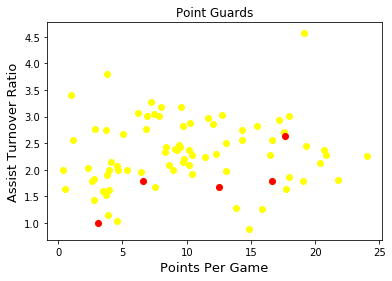

In [6]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

## Convert the centroids Dataframe to a dictionary


In [7]:
def centroids_to_dict(centroids):
    
    # This dictionary will store {cluster_id : [ppg, atr]}
    dictionary = {}
    
    # This counter will store the cluster_id.
    counter = 0
    
    # Iterate through the dataframe rows.
    for index, row in centroids.iterrows():
        
        # Extract the values of ppg and atr
        ppg, atr = row['ppg'], row['atr']
        
        # Assign the current counter number to cluster_id
        cluster_id = counter
        
        # Make a key:value pair
        dictionary[cluster_id] = [ppg, atr]
        
        # Increament the counter
        counter+=1
    
    return dictionary

In [8]:
centroids_dict = centroids_to_dict(centroids)
centroids_dict

{0: [12.535211267605634, 1.6704545454545454],
 1: [16.67142857142857, 1.785425101214575],
 2: [17.65753424657534, 2.6449704142011834],
 3: [3.0714285714285716, 1.0],
 4: [6.571428571428571, 1.7833333333333334]}

## Euclidean Distance

In [9]:
# This function will calculate the euclidean distance between each player and the centroid.
def calculate_distance(centroid, player_values):
    
    # Initialise the distance
    total_dist = 0
    
    # Iterate over each individual value
    for i in range(len(centroid)):
        dist = centroid[i] - player_values[i]
        squared_dist = dist ** 2
        total_dist += squared_dist
       
    euclidean_dist = np.sqrt(total_dist)
       
    return euclidean_dist

## Assign a cluster_id to each player (Step 1)

In [10]:
# This function will calculate the euclidean distance for the row and each centroid point (there are 5 centroids). 
def assign_to_cluster(row):
    
    # This dictionary will store the euclidean distance between each centroid and the row. 
    # {cluster_id : euclidean_dict}
    dictionary = {}
    
    # Extract ppg and atr values
    player_value = [row['ppg'], row['atr']]
    
    # For each centroid coordinate.
    for cluster_id, centroid_value in centroids_dict.items():
        
        # Calculate euclidean distance
        euclidean_dist = calculate_distance(centroid_value, player_value)
        
        # Store the distance in the dictionary.
        dictionary[cluster_id] = euclidean_dist
        
    # retrieve the cluster_id with minimum distance.
    min_cluster_id = min(dictionary, key = dictionary.get)
    return min_cluster_id  

In [11]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,stl,blk,tov,pf,pts,season,season_end,ppg,atr,cluster
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,53,3,125,147,930,2013-2014,2013,13.098592,2.504000,0
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,7,4,19,30,150,2013-2014,2013,7.500000,1.684211,4
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,26,0,125,129,660,2013-2014,2013,8.354430,2.424000,4
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,60,9,82,161,666,2013-2014,2013,9.250000,2.365854,4
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,54,8,102,85,378,2013-2014,2013,6.872727,3.009804,4
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,69,14,143,99,763,2013-2014,2013,17.744186,1.643357,2
60,Avery Bradley,PG,23,BOS,60,58,1855,361,825,0.438,...,63,11,96,145,891,2013-2014,2013,14.850000,0.885417,1
64,Aaron Brooks,PG,29,TOT,72,12,1557,233,581,0.401,...,52,13,117,146,645,2013-2014,2013,8.958333,1.991453,4
71,Trey Burke,PG,21,UTA,70,68,2262,341,897,0.380,...,42,6,131,145,895,2013-2014,2013,12.785714,3.022901,0
76,Dwight Buycks,PG,24,TOR,14,0,146,15,48,0.313,...,8,0,10,11,43,2013-2014,2013,3.071429,1.000000,3


## Visualise the Clusters

In [12]:
# This function will visualise the clusters.
def visualise_clusters(df):
    fig, ax = plt.subplots()
    df.plot.scatter('ppg', 'atr', c='cluster', colormap='Set1', colorbar=False, ax=ax)
    ax.set(xlabel='points per game', ylabel='assist to turnover ratio', title='Point Guards')
    plt.show()

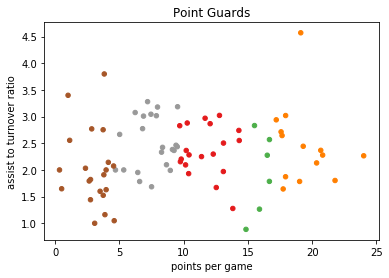

In [13]:
visualise_clusters(point_guards)

## Recalculate the Centroids for Each Cluster (Step 2)

In [14]:
# This function will recalculate the centroid for each cluster
def recalculate_centroids(df):
    
    # This dictionary will store the new coordinates for each cluster_id
    dictionary = {}
    
    # for each cluster_id from 0 to 4.
    for cluster_id in range(5):
        
        # Extract the corresponding rows
        cluster_df = df[df['cluster']==cluster_id]
        
        # calculate mean values of ppg and atr.
        mean_ppg, mean_atr = cluster_df['ppg'].mean(), cluster_df['atr'].mean()
        
        # store the avg values in the dictionary
        dictionary[cluster_id] = [mean_ppg, mean_atr]
       
    return dictionary       

In [15]:
centroids_dict = recalculate_centroids(point_guards)
centroids_dict

{0: [11.685979213867641, 2.3612872971873546],
 1: [16.019454712264654, 1.935584047095941],
 2: [19.366254670549946, 2.4630502116571718],
 3: [2.999304341031159, 2.0048941699589897],
 4: [7.589205077005426, 2.506832312884008]}

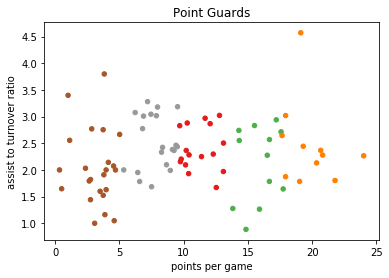

In [16]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualise_clusters(point_guards)

## Repeat Step 2 and Step 1

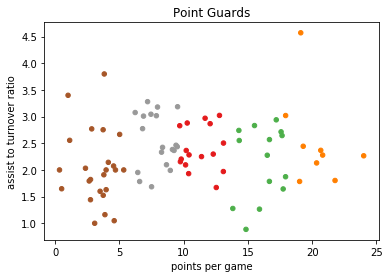

In [17]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualise_clusters(point_guards)

## Summary

As you repeat ***Steps 1 and 2*** and run ***visualize_clusters***, you'll notice that a few of the points are changing clusters between every iteration (especially in areas where 2 clusters almost overlap), but otherwise, the clusters visually look like they don't move a lot after every iteration. This means 2 things:

* K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
* Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

To counteract these problems, the sklearn implementation of K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

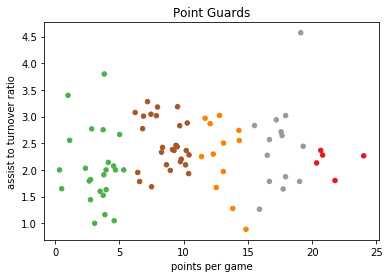

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualise_clusters(point_guards)